<a href="https://colab.research.google.com/github/Sumitjh26997/CSS581-ML/blob/main/CSS581_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import keras
import tensorflow as tf

In [4]:
# for loading/processing the images
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
from numpy import asarray




In [5]:

path = "./"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            flowers.append(file.name)



In [6]:
def extract_pixels(file):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # get the feature vector
    features = img.flatten()
    return features

data = {}
p = r"/content/drive/MyDrive/"

# loop through each image in the dataset
for flower in flowers:
    #  extract the features and update the dictionary
      feat = extract_pixels(flower)
      data[flower] = feat


# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))



In [7]:
feat.shape

(210, 150528)

In [8]:

# function that lets you view a cluster (based on identifier)
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')


In [9]:
x=feat

Apply elbow method to find the best K for the K-means

In [10]:
kmeans= KMeans(n_clusters=10)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [11]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

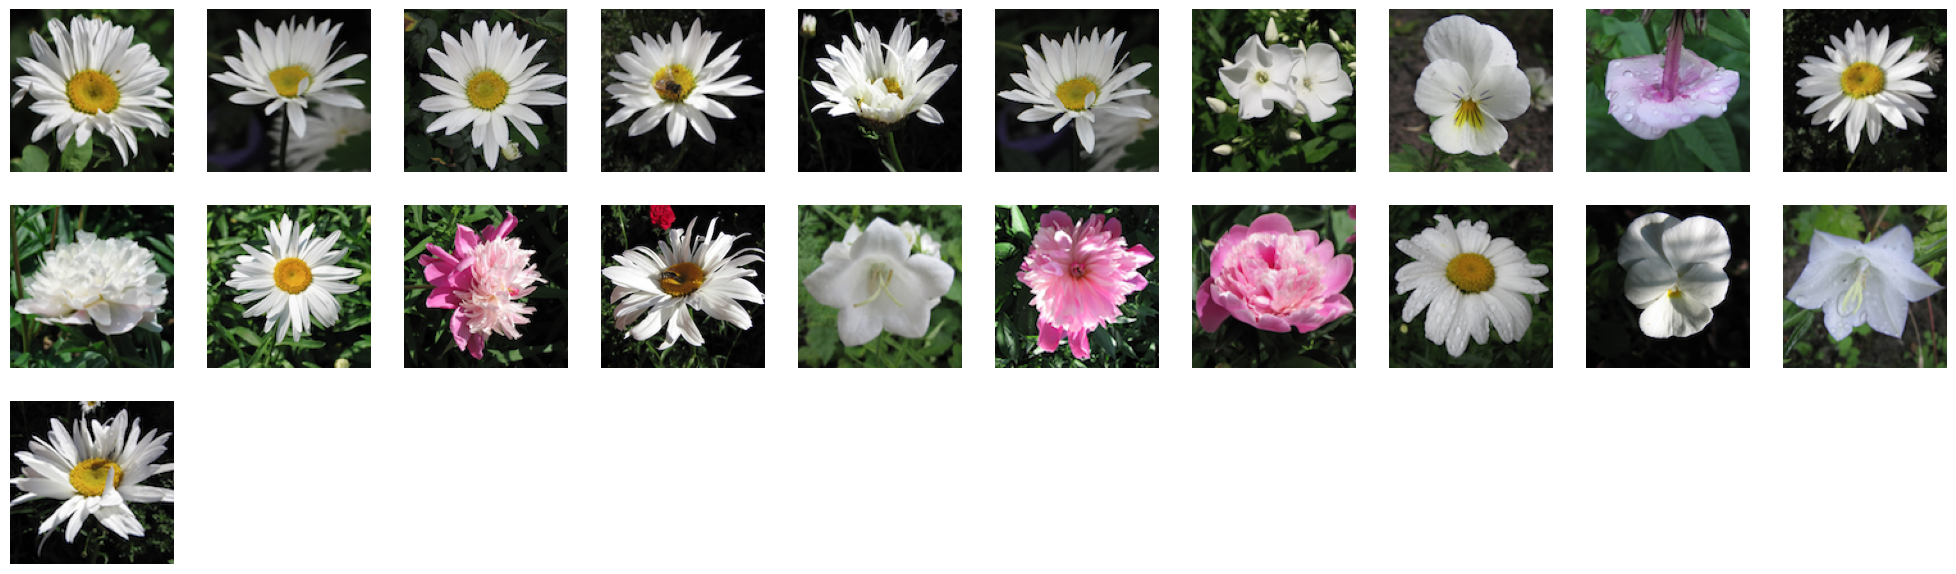

In [12]:
view_cluster(3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

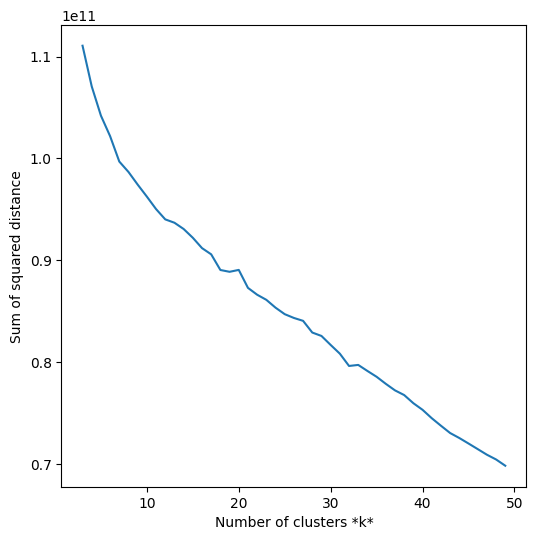

In [13]:
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)

    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(x)
x_reduced = pca.transform(x)
print(pca.explained_variance_ratio_)

[0.15923505 0.08632716 0.047251   0.03724552 0.0295879  0.02652054
 0.02406883 0.01860515 0.01804974 0.01660258 0.01338124 0.01190618
 0.01160499 0.01126022 0.01026088 0.0100518  0.00975144 0.00924348
 0.00859662 0.00840708 0.00808339 0.00778484 0.0075174  0.00743065
 0.00724554 0.00698867 0.0066673  0.00649786 0.0062785  0.00604621
 0.0057888  0.00564818 0.00544634 0.00534464 0.00521395 0.00504508
 0.00493746 0.00481063 0.00471432 0.00455876 0.00439916 0.00439745
 0.00430687 0.00421347 0.00416274 0.00410971 0.00399689 0.00391114
 0.00387757 0.00386137 0.0037486  0.00373049 0.0036639  0.00357255
 0.00346012 0.00339366 0.00333321 0.00330199 0.00326178 0.00321483
 0.00318255 0.00312907 0.00307307 0.00306116 0.0030444  0.00295147
 0.00291287 0.0028711  0.00285718 0.00281426 0.0027983  0.00273527
 0.00271635 0.00267836 0.00264377 0.00262281 0.00261106 0.00257267
 0.00256195 0.00252469 0.00249362 0.00246221 0.00244432 0.00239696
 0.00238329 0.00236327 0.00233457 0.00230075 0.00227433 0.0022

In [22]:
kmeans_pca= KMeans(n_clusters=10)
kmeans_pca.fit(x_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [23]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

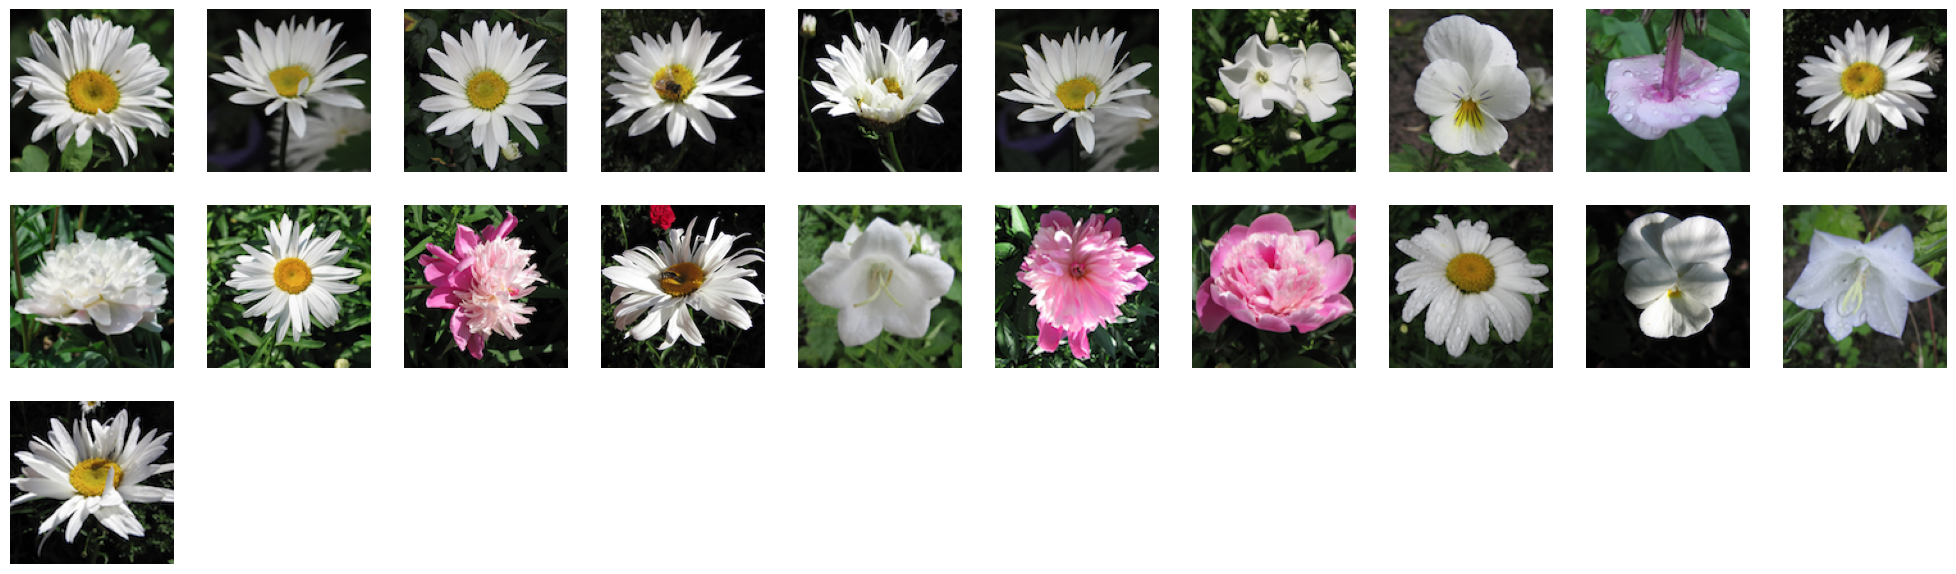

In [24]:
view_cluster(3)

# Apply GMM

# Apply T-SNE

In [ ]:
#tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)

NameError: ignored

In [ ]:
# #Do not run: Sample code for plotting in 3 D
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(pca_tsne2[:, 0], pca_tsne2[:, 1],pca_tsne2[:,2], s= 5, c=y_subset, cmap='Spectral')
# plt.show()

# Let's Look at Advanced Features

In [ ]:
#load a CNN model and extrac its feature representation. This cell will take a while
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

553467096/553467096 [==============================] - 4s 0us/step


In [ ]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

data = {}
p = r"/content/drive/MyDrive/"

# loop through each image in the dataset
for flower in flowers:
    #  extract the features and update the dictionary
      feat = extract_features(flower,model)
      data[flower] = feat


# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)


1/1 [==============================] - 0s 16ms/step


In [ ]:
# get the unique labels (from the flower_labels.csv)
df = pd.read_csv('flower_labels.csv')
label = df['label'].tolist()
unique_labels = list(set(label))

# reduce the amount of dimensions in the feature vector
# pca = PCA(n_components=100, random_state=22)
# pca.fit(feat)
# x = pca.transform(feat)
# print(pca.explained_variance_ratio_)


In [ ]:
len(unique_labels)

10

In [ ]:
# cluster feature vectors
kmeans = KMeans(n_clusters=10, random_state=22)
kmeans.fit(feat)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


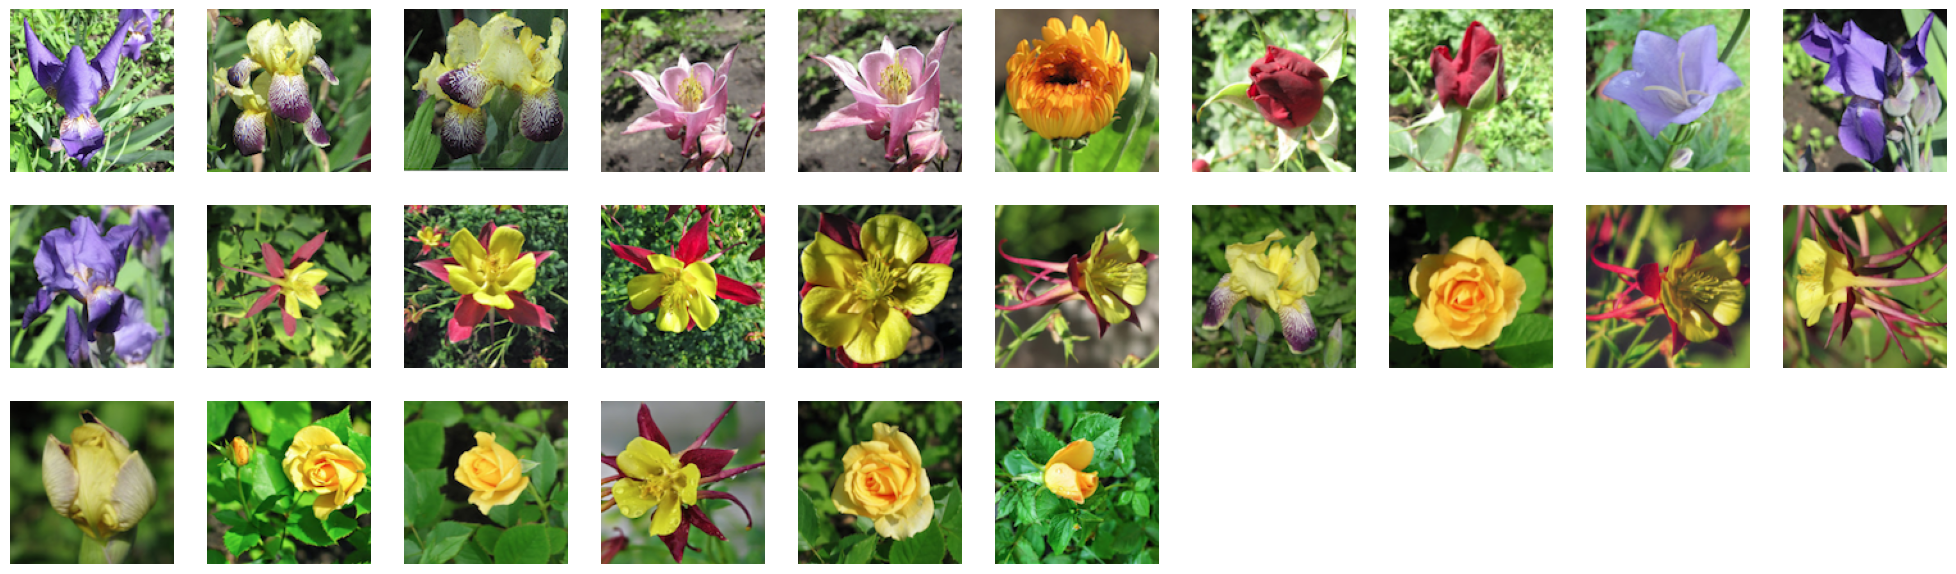

In [ ]:
view_cluster(6)

# Dedcide on value of the K.

Discuss the following questions with your group. How does using features from CNN model versus PCA change your clusters.

# Apply Silouhette Analysis

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_labels = kmeans_pca.fit_predict(x_reduced)
silhouette_avg = silhouette_score(x_reduced, cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
silhouette_avg

0.040513827392378576

For n_clusters = 2 The average silhouette_score is : 0.1087752418014112
For n_clusters = 3 The average silhouette_score is : 0.07018425467523667
For n_clusters = 4 The average silhouette_score is : 0.0770608704007278
For n_clusters = 5 The average silhouette_score is : 0.0659556194382334
For n_clusters = 6 The average silhouette_score is : 0.057307978593889405
For n_clusters = 10 The average silhouette_score is : 0.046100209349455745
For n_clusters = 15 The average silhouette_score is : 0.0421572395520137
For n_clusters = 20 The average silhouette_score is : 0.0332842453626058
For n_clusters = 25 The average silhouette_score is : 0.011386797516340457
For n_clusters = 30 The average silhouette_score is : 0.011556700852688676
For n_clusters = 35 The average silhouette_score is : 0.016129424044986587


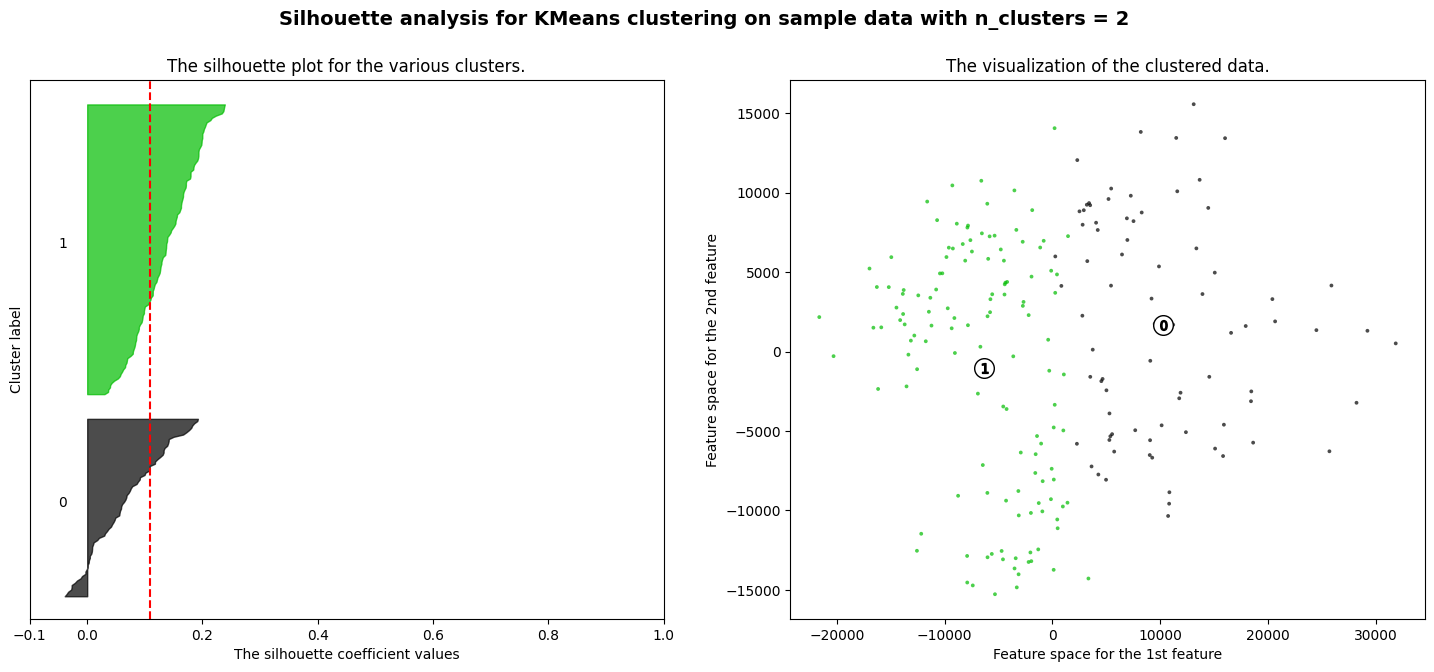

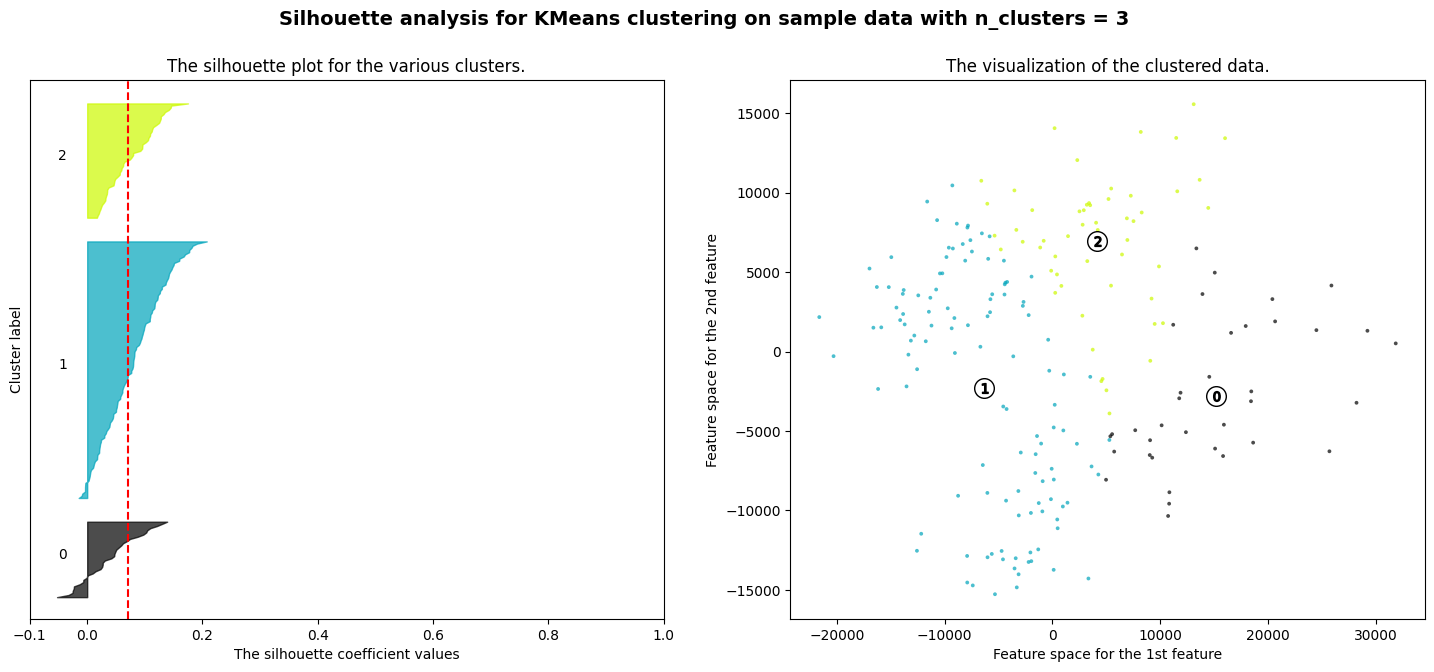

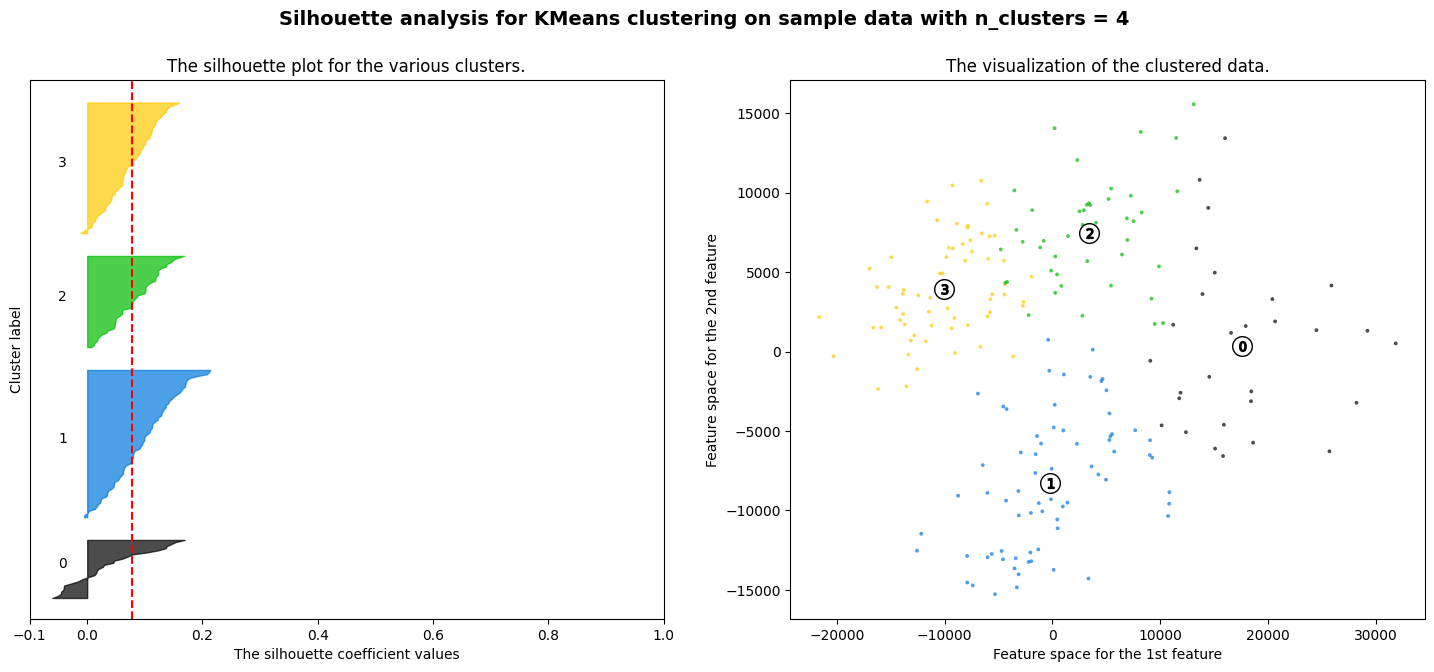

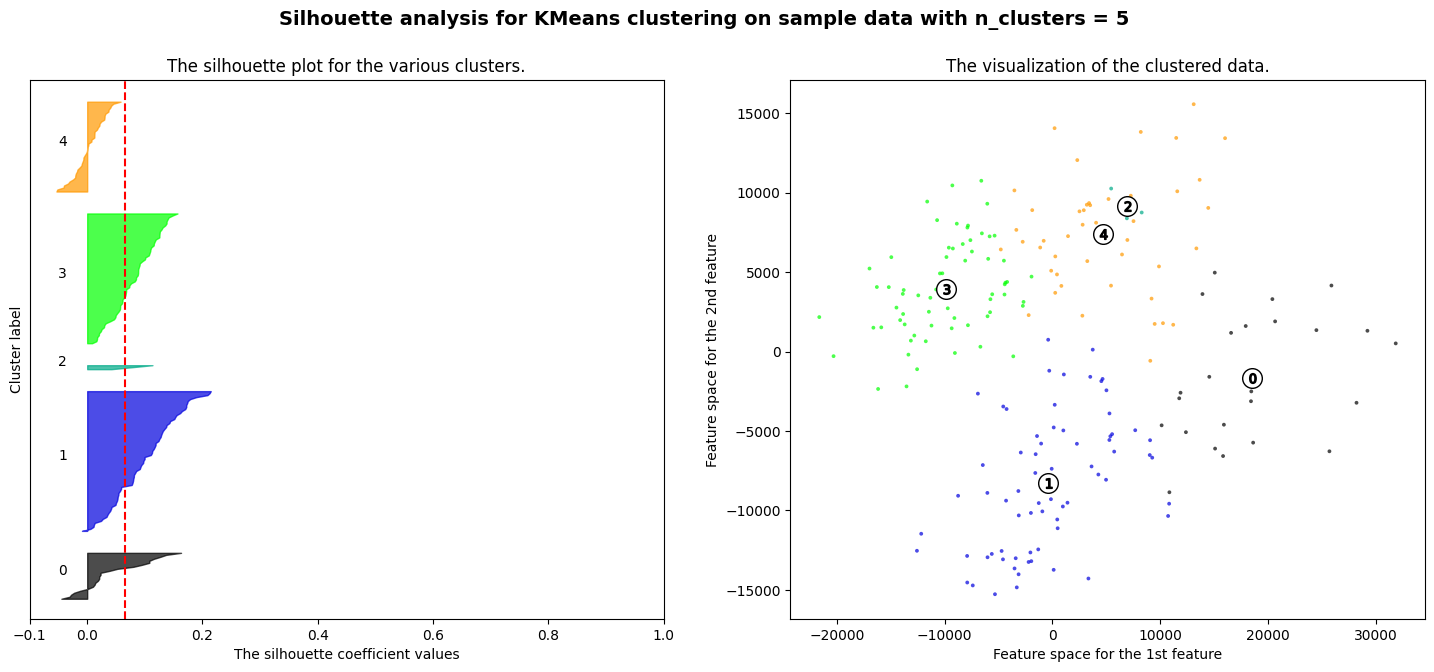

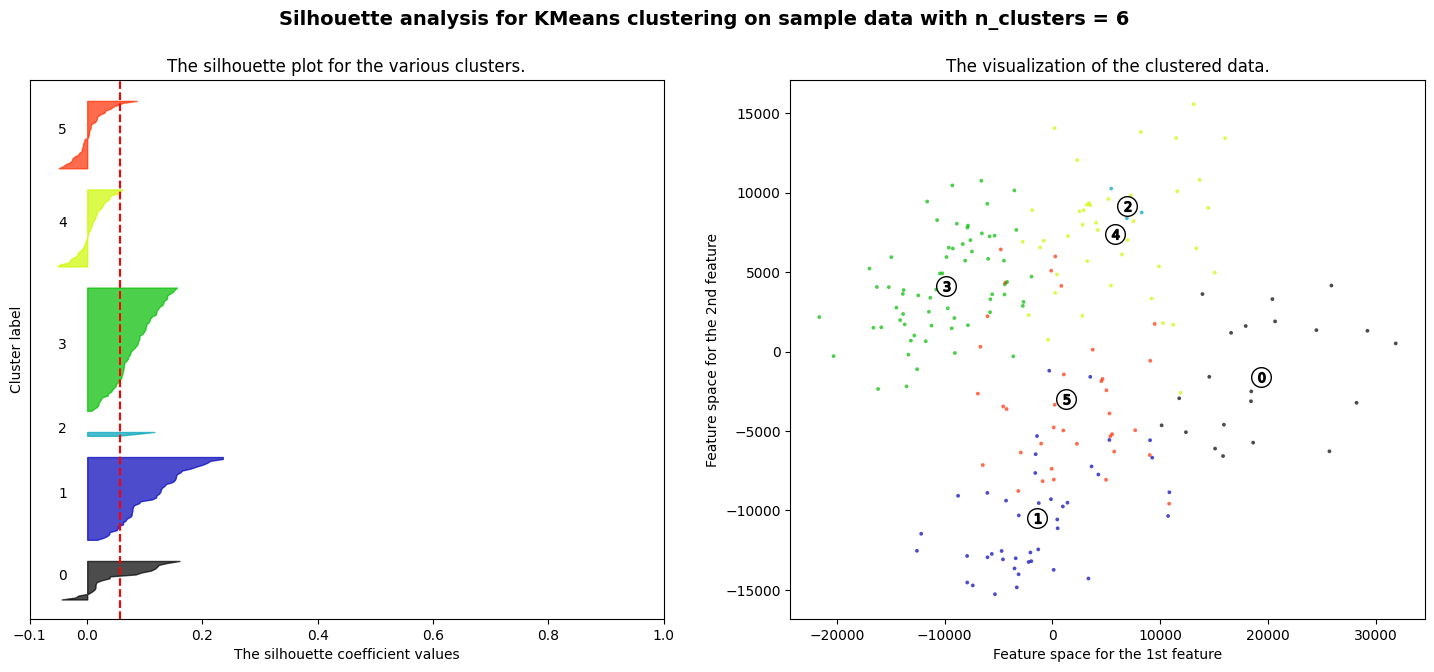

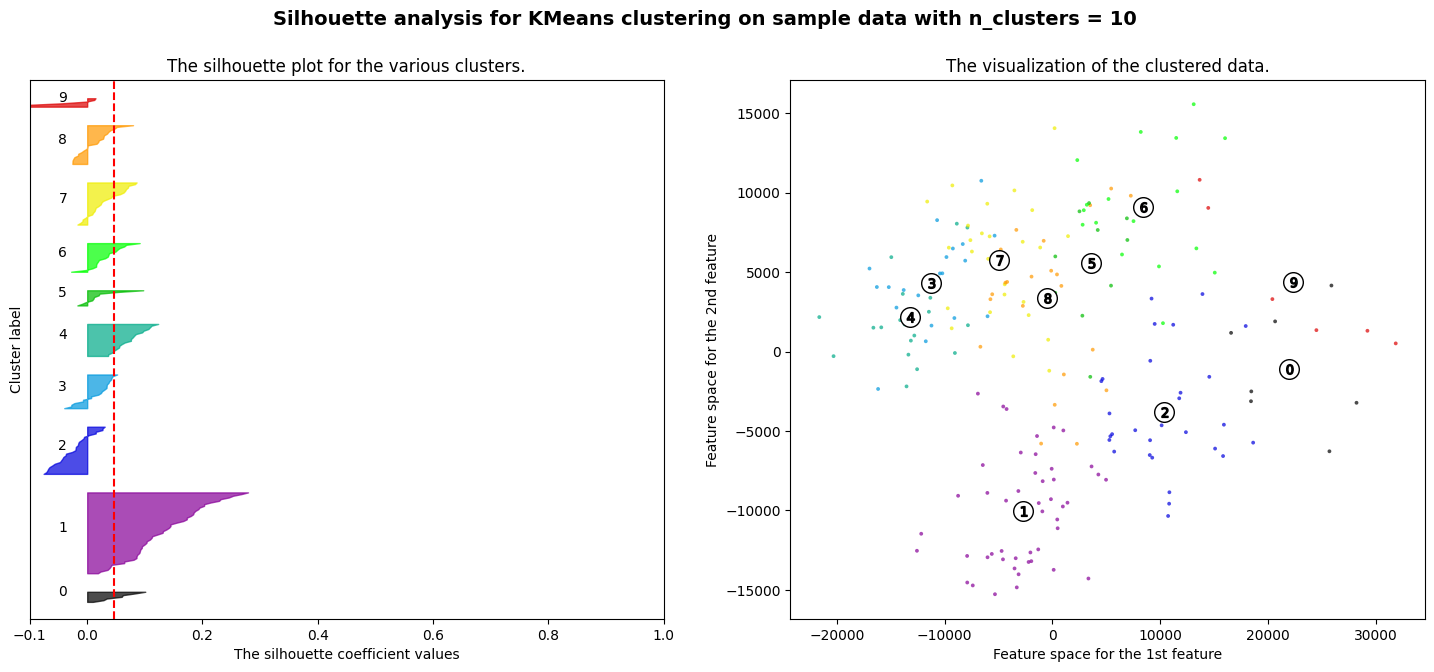

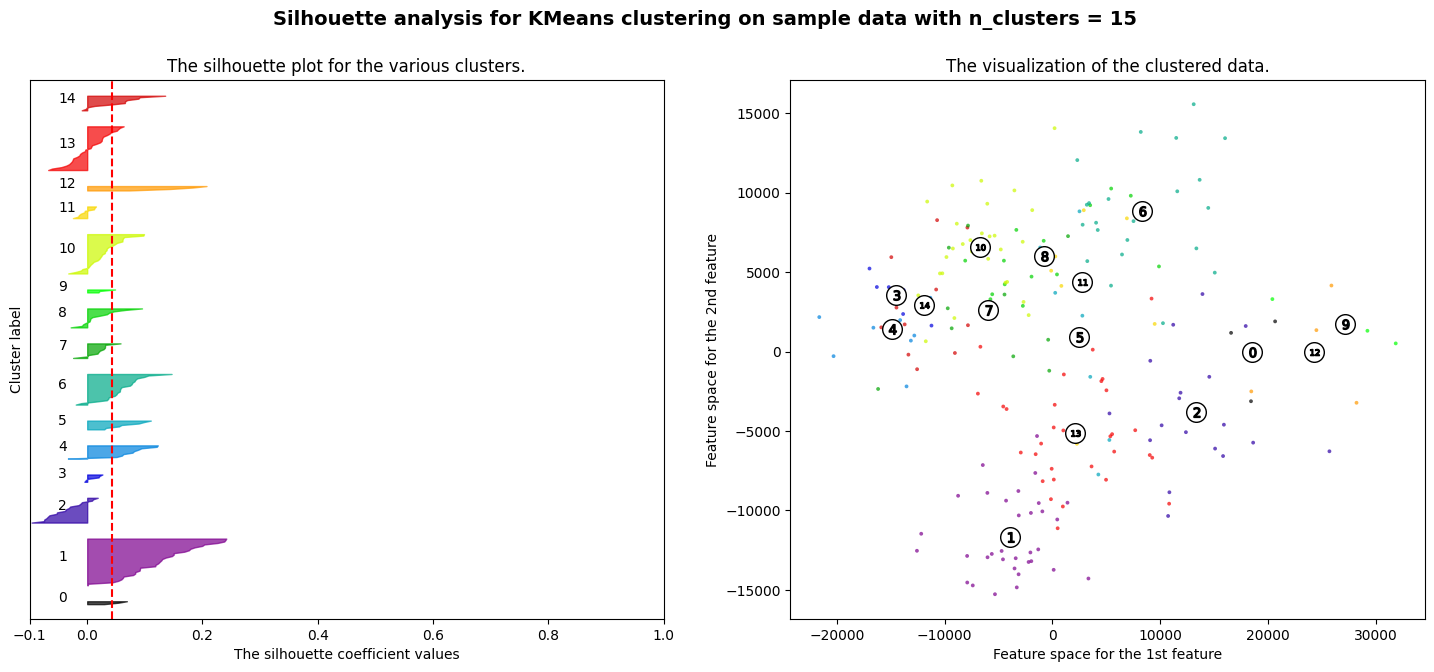

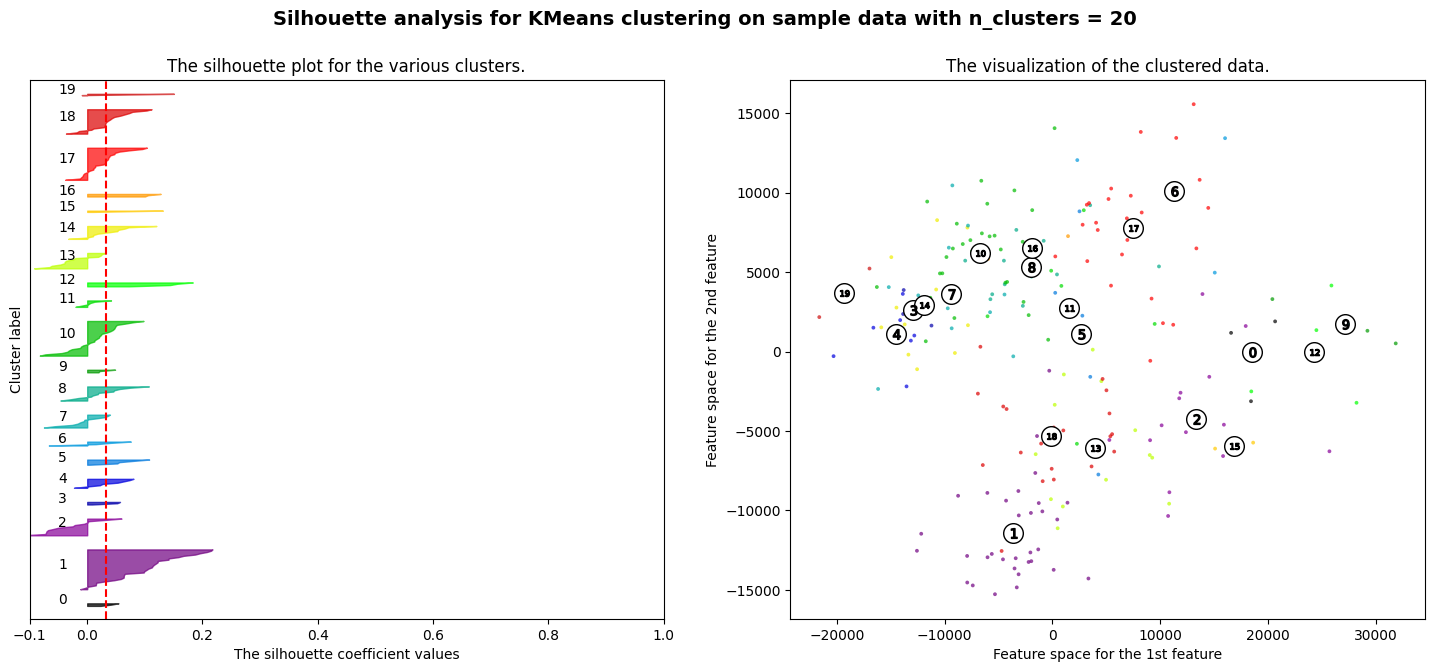

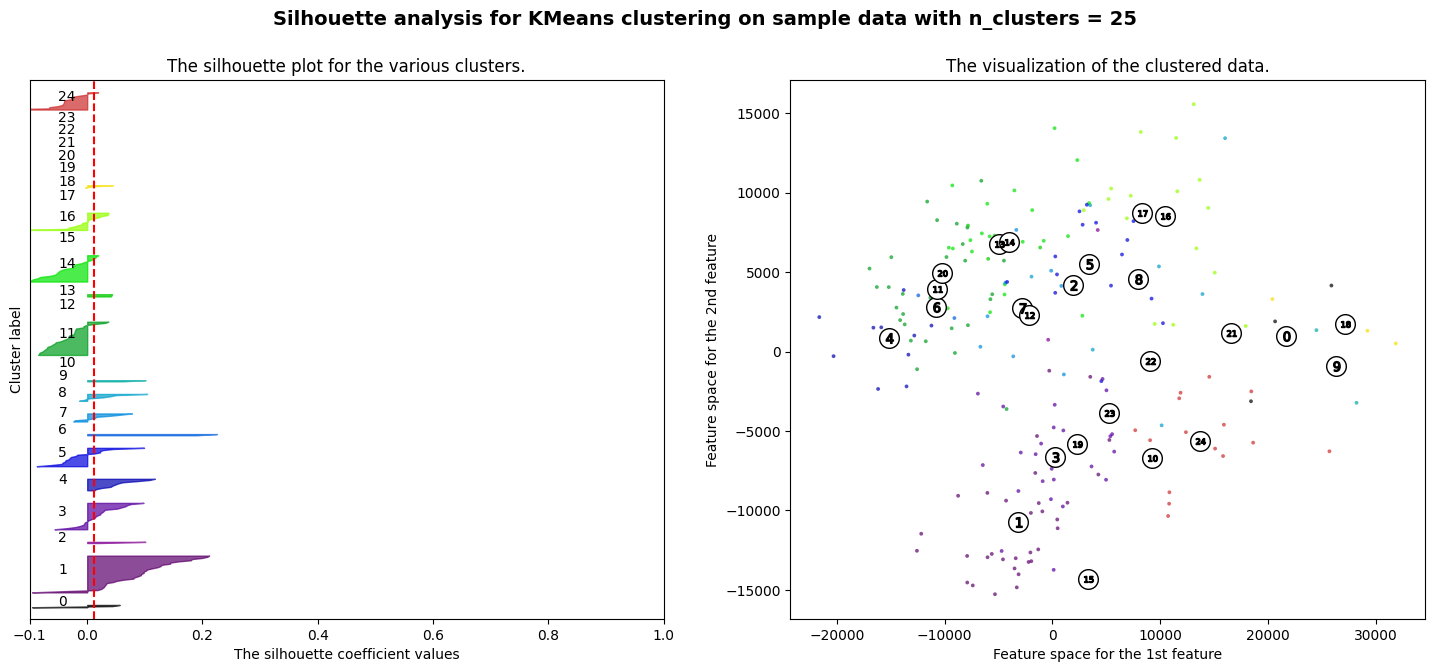

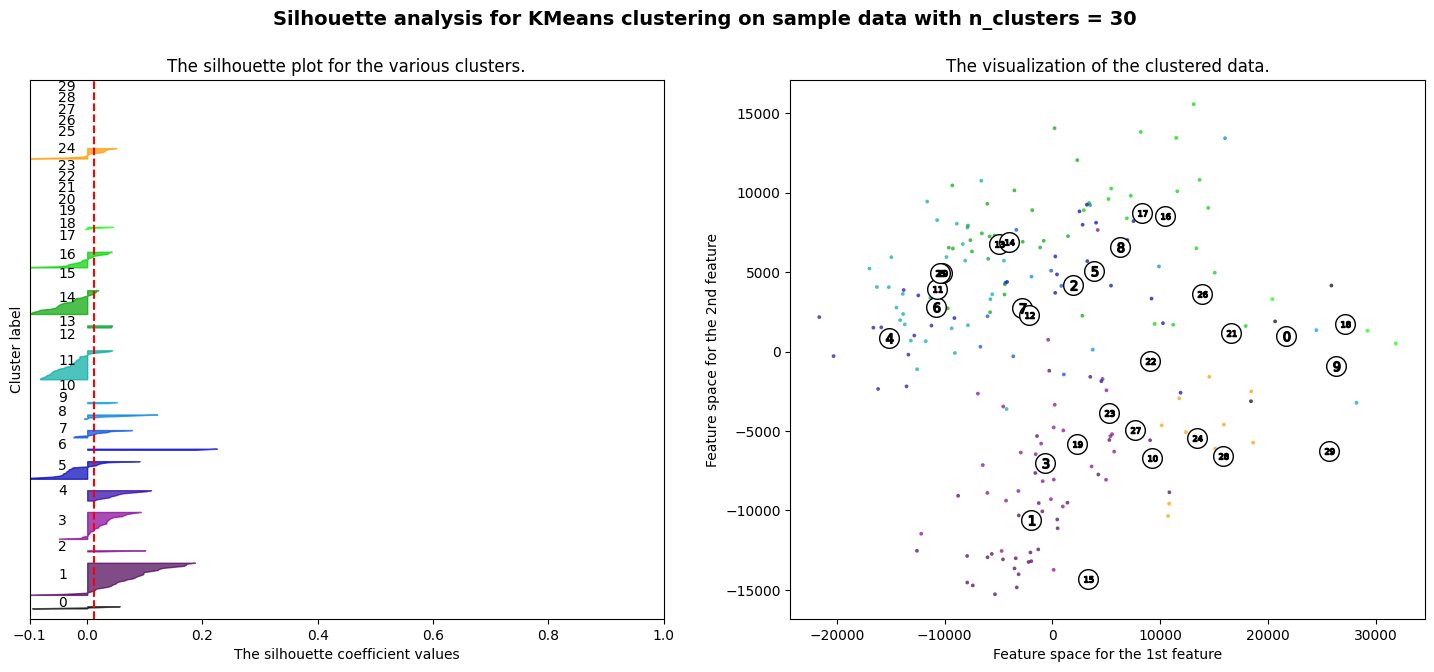

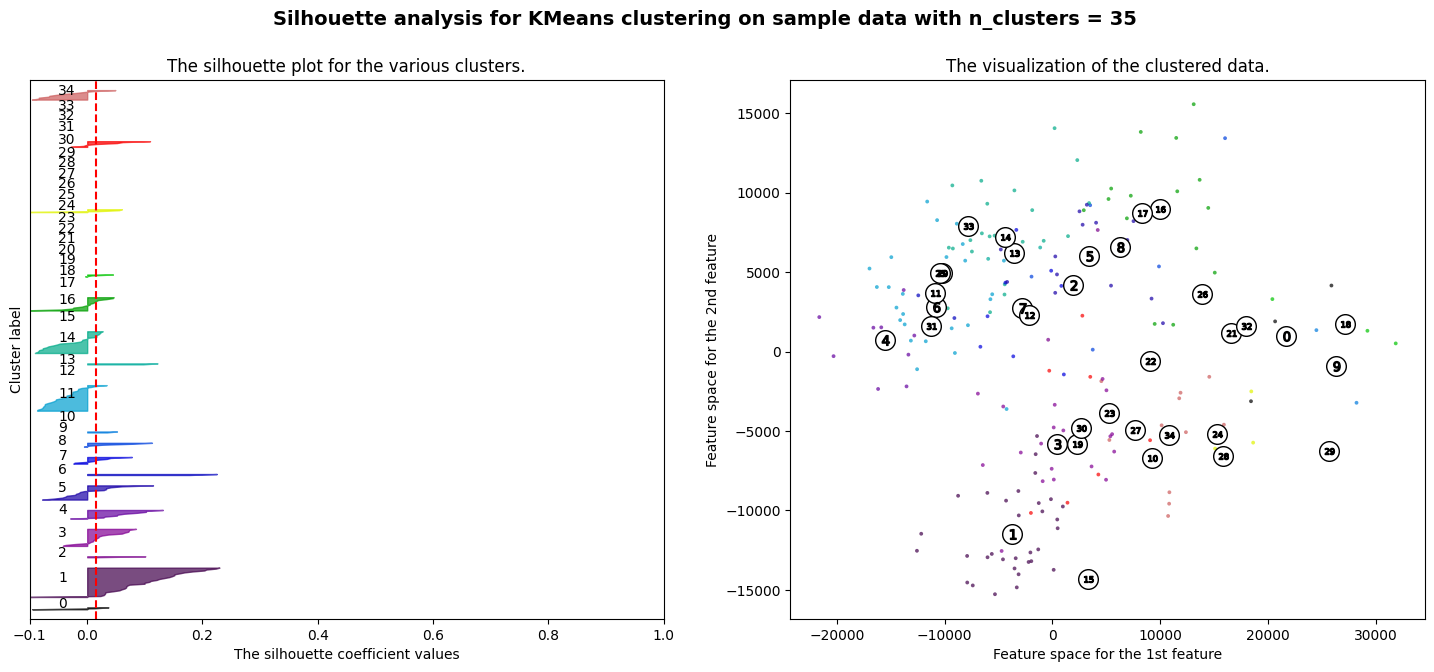

In [32]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

range_n_clusters = [2, 3, 4, 5, 6, 10, 15, 20, 25, 30, 35]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_reduced) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(x_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_reduced, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x_reduced[:, 0], x_reduced[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()